In [1]:
import numpy as np # numpy arrays
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import string
import math
import re
from wordcloud import WordCloud, STOPWORDS
import warnings
warnings.filterwarnings('ignore')

In [2]:
sms = pd.read_csv('D:\IARE\Project\multiClass.csv',encoding='latin-1')
sms.head()

,type,message
0,0,"Go until jurong point , crazy . . Available on..."
1,0,Ok lar ... Joking wif u oni ...
2,1,Free entry in [NUMBER] a wkly comp to win [MIS...
3,0,U dun say so early hor ... U c already then sa...
4,0,"Nah I do n't think he goes to usf , he lives a..."


In [3]:
sms = sms.rename(columns={'type':'label_num', 'message':'text'})




# Label mapping: ham->0, spam-> 1
sms['label'] = sms['label_num'].map({0:'ham', 1:'spam', 2:'alerts', 3:'transactions', 4:'otp'})

# Length column
sms['Length'] = sms['text'].apply(len)
sms.head()

,label_num,text,label,Length
0,0,"Go until jurong point , crazy . . Available on...",ham,116
1,0,Ok lar ... Joking wif u oni ...,ham,31
2,1,Free entry in [NUMBER] a wkly comp to win [MIS...,spam,210
3,0,U dun say so early hor ... U c already then sa...,ham,51
4,0,"Nah I do n't think he goes to usf , he lives a...",ham,63


In [4]:
sms['label'].value_counts()

transactions    1807
spam            1772
ham             1729
otp             1625
alerts           465
Name: label, dtype: int64

In [5]:
sms.countplot(sms['label'],palette=sms.color_palette("Set2"))

AttributeError: 'DataFrame' object has no attribute 'countplot'

In [6]:
sms.countplot(sms['Length'], palette=sms.color_palette("Set2"))

AttributeError: 'DataFrame' object has no attribute 'countplot'

In [11]:
print("Average Length of a text is", round(sms['Length'].mean()))
print("Standard deviation of length is", round(sms['Length'].std()))

Average Length of a text is 124
Standard deviation of length is 99


In [7]:
spam_len = sms.loc[sms["label_num"] == 1, "Length"]
ham_len = sms.loc[sms["label_num"] == 0, "Length"]
alerts_len = sms.loc[sms["label_num"] == 2, "Length"]
otp_len = sms.loc[sms["label_num"] == 4, "Length"]
transaction_len = sms.loc[sms["label_num"] == 3, "Length"]
print("SPAM",spam_len.mean(),spam_len.std())
print("HAM",ham_len.mean(),ham_len.std())
print("ALERTS",alerts_len.mean(),alerts_len.std())
print("OTP",otp_len.mean(),otp_len.std())
print("TRANSACTIONS",transaction_len.mean(),transaction_len.std())

SPAM 227.75056433408577 98.14874729116686
HAM 78.43262001156738 68.3082118466692
ALERTS 173.18064516129033 173.33518969514483
OTP 67.86584615384615 43.204268758470484
TRANSACTIONS 102.32982844493635 27.06177484837191


In [8]:
# Remove Punctuation

def remove_punctuation(text):
    puncFree ="".join([i for i in text if i not in string.punctuation])
    return puncFree

sms['text'] = sms['text'].apply(lambda x: remove_punctuation(x))

In [9]:
# Lower Case
sms['text'] = sms['text'].apply(lambda x: x.lower())

7397


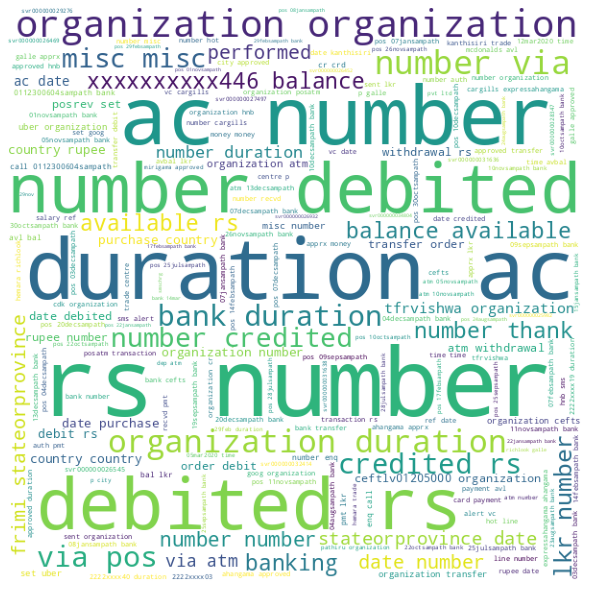

In [23]:
comment_words = ''
stopwords = set(STOPWORDS)
j=-1
# iterate through the csv file
for val in sms.text:
    j=j+1
    # typecaste each val to string
    val = str(val)
    if sms.label_num[j]==3:
        # split the value
        tokens = val.split()
        # Converts each token into lowercase
        for i in range(len(tokens)):
            tokens[i] = tokens[i].lower()

        comment_words += " ".join(tokens)+" "
print(j)
wordcloud = WordCloud(width = 600, height =600,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 5).generate(comment_words)
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

In [10]:
sms['text'] = sms['text'].apply(lambda x: x.lower())
from sklearn.model_selection import train_test_split

# dataframe -> array
X, y = np.asanyarray(sms['text']), np.asanyarray(sms['label_num'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=24)
len(X_train), len(X_test)
d={0:0,1:0,2:0,3:0,4:0}
for i in range(len(X_test)):
    d[y_test[i]]+=1
print(d)

{0: 347, 1: 343, 2: 96, 3: 367, 4: 327}


In [11]:

from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.naive_bayes import MultinomialNB


counter_vec = CountVectorizer().fit(X_train)
X_train_vec, X_test_vec = counter_vec.transform(X_train), counter_vec.transform(X_test)

Neural Network : 0.9628378378378378
              precision    recall  f1-score   support

           0       0.93      0.98      0.96       347
           1       0.97      0.90      0.94       343
           2       0.80      0.84      0.82        96
           3       1.00      1.00      1.00       367
           4       0.99      1.00      1.00       327

    accuracy                           0.96      1480
   macro avg       0.94      0.95      0.94      1480
weighted avg       0.96      0.96      0.96      1480



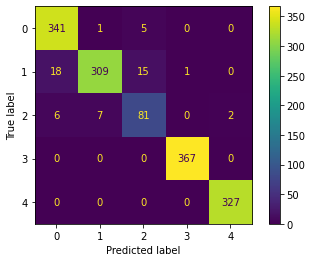

In [12]:
classifiers = [['Neural Network :', MLPClassifier(max_iter = 3000,activation="relu",hidden_layer_sizes=(150,100, 50, 25))]#,
               #['LogisticRegression :', LogisticRegression(max_iter = 5000)],
               #['Naive Bayes :', MultinomialNB()],
               #['SVM :', SVC()],
              ]

predictions_df = pd.DataFrame()
predictions_df['action'] = y_test

for name,classifier in classifiers:
    classifier.fit(X_train_vec, y_train)
    predictions = classifier.predict(X_test_vec)
    predictions_df[name.strip(" :")] = predictions
    print(name, accuracy_score(y_test, predictions))
    print(classification_report(y_test, classifier.predict(X_test_vec)))
    plot_confusion_matrix(classifier, X_test_vec, y_test)

0.9768888888888889


0.9733333333333334
